In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
missing_values = [np.nan, "na", "N/a", "NaN", "nan", "NULL", "null", "None", "-999", "-1", "Unknown", "Missing", "Not Available", "N/A", "NA", "n/a", ""]

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data.csv", na_values=missing_values)
data_genre = pd.read_csv("/content/drive/MyDrive/data_by_genres.csv", na_values=missing_values)
data_year = pd.read_csv("/content/drive/MyDrive/data_by_year.csv", na_values=missing_values)

In [ ]:
print("Columns of data:",data.columns)
print("Columns of data_genre:",data_genre.columns)
print("Columns of data_year:",data_year.columns)

Columns of data: Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
Columns of data_genre: Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')
Columns of data_year: Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')


In [ ]:
print("Shape of data:",data.shape)
print("Shape of data_genre:",data_genre.shape)
print("Shape of data_year:",data_year.shape)

Shape of data: (170653, 19)
Shape of data_genre: (2973, 14)
Shape of data_year: (100, 14)


In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                2
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [ ]:
data.shape

(170651, 19)

In [ ]:
data_genre.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [ ]:
data_year.isnull().sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

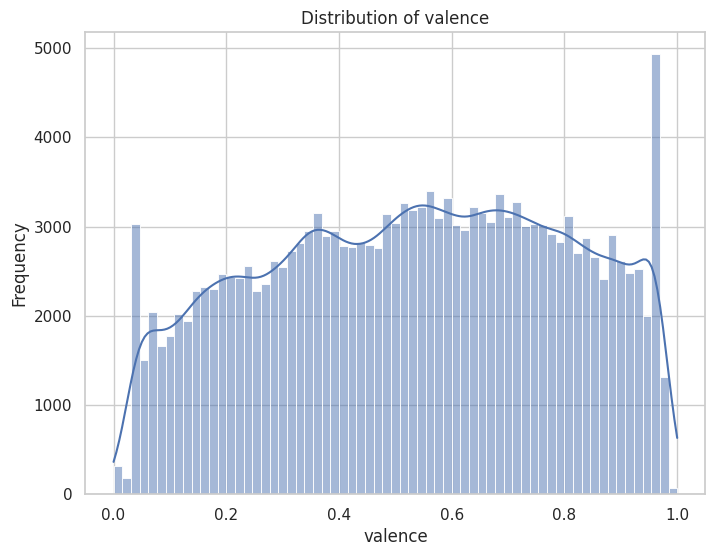

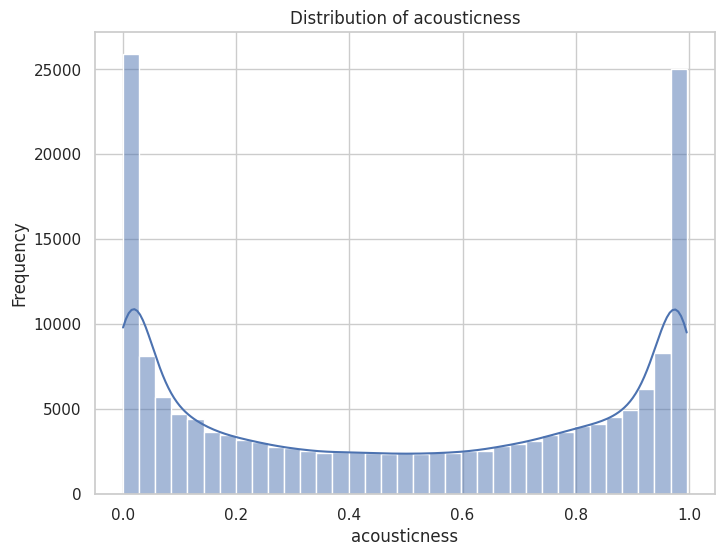

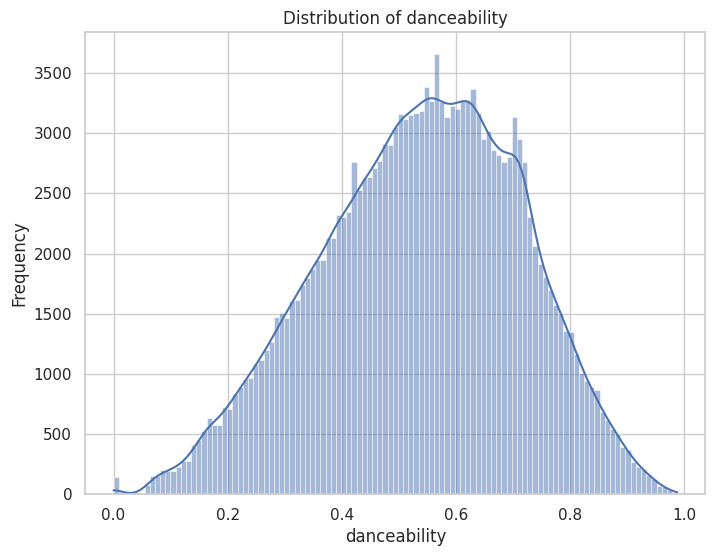

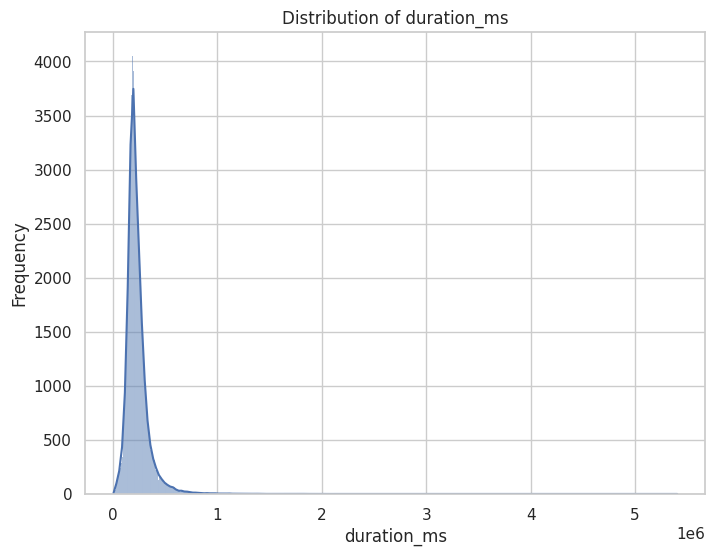

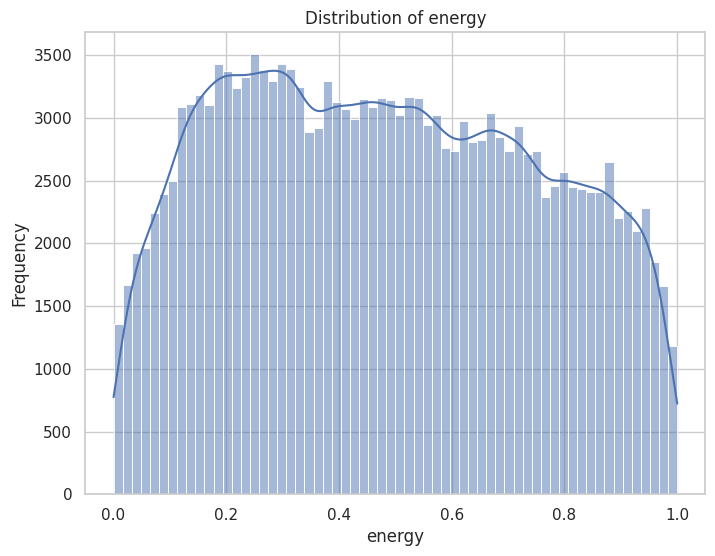

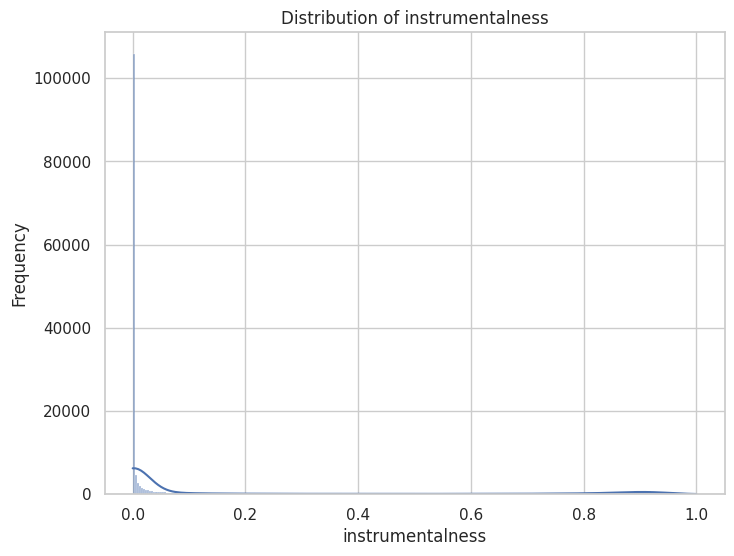

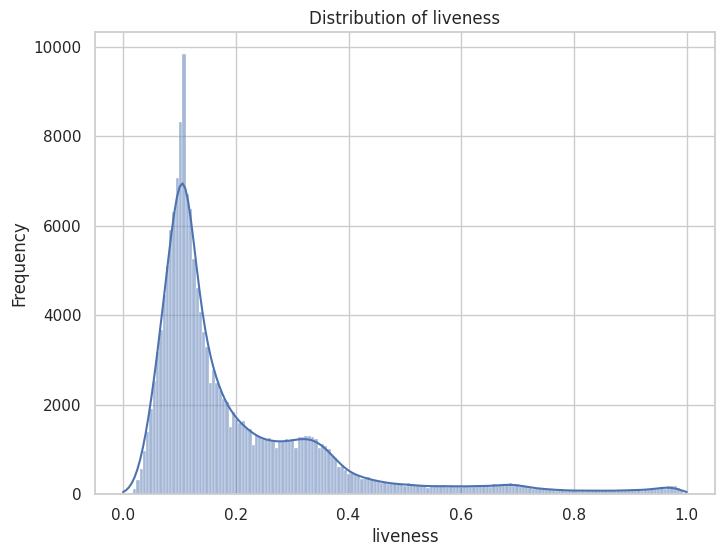

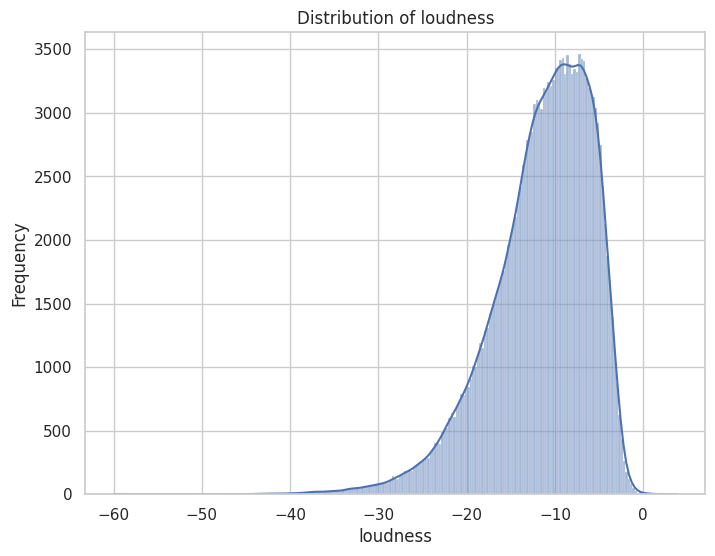

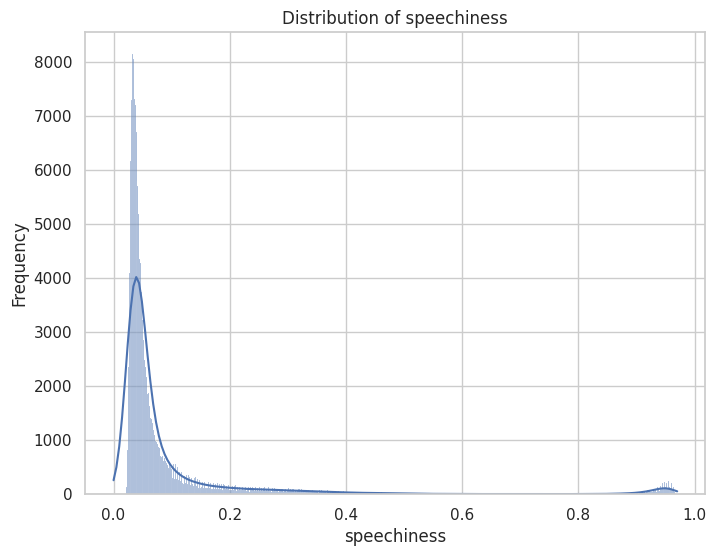

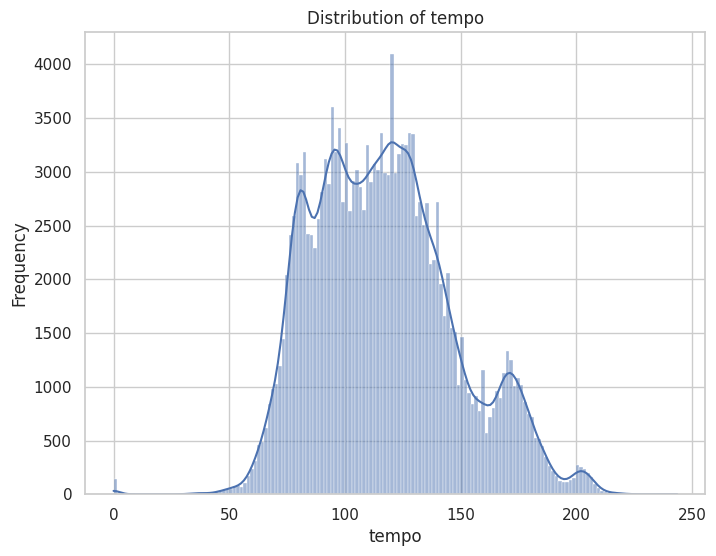

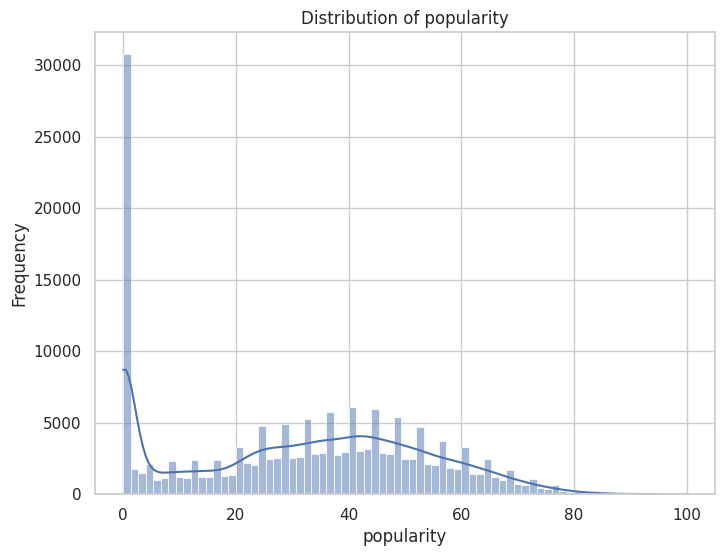

In [ ]:
num_columns = ['valence', 'acousticness', 'danceability', 'duration_ms',
               'energy', 'instrumentalness', 'liveness', 'loudness',
               'speechiness', 'tempo', 'popularity']
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-46-bfda1058c1a6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




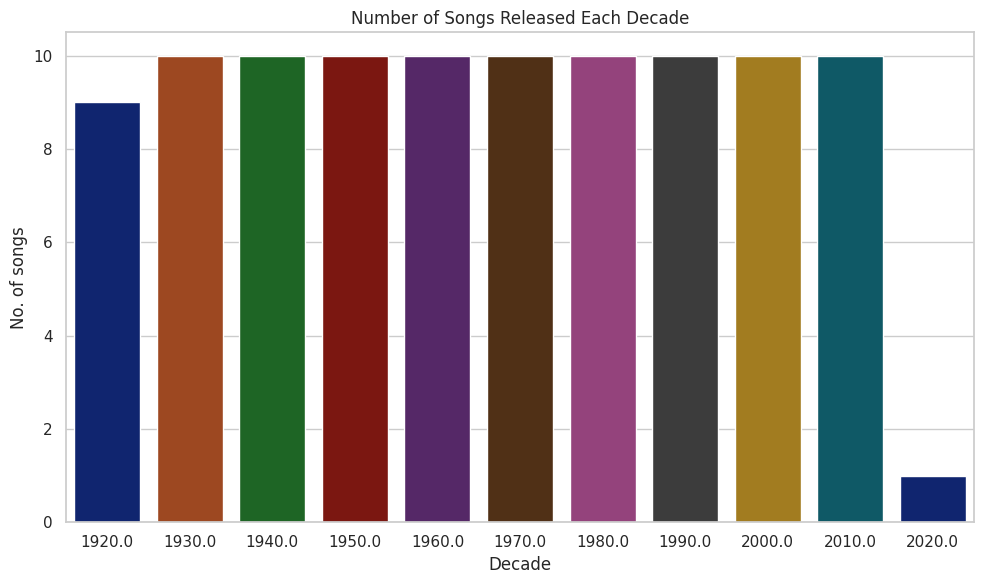

In [ ]:
data_copy = data.copy()
data_copy['decade'] = (data_year['year'] // 10) * 10
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=data_copy, palette='dark')
plt.title('Number of Songs Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('No. of songs')
plt.tight_layout()
plt.show()

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data_year, x='year', y=sound_features)
fig.show()

In [ ]:
data_genre_copy = data_genre.copy()
data_genre_copy['decade'] = (data['year'] // 10) * 10
genre_counts_per_decade = data_genre_copy.groupby(['decade', 'genres']).size().reset_index(name='count')
fig = px.area(genre_counts_per_decade, x='decade', y='count', color='genres',
              labels={'count': 'Number of Songs', 'decade': 'Decade'},
              title='Change of Genres Decade-wise')
fig.show()

In [ ]:
top10_genres = data_genre.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
pip install scikit-surprise

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

data['user'] = 0

reader = Reader(rating_scale=(0, 100))
data_surprise = Dataset.load_from_df(data[['user', 'id', 'popularity']], reader)

trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Train SVD model
model_svd = SVD()
model_svd.fit(trainset)

# Train KNN model
model_knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
model_knn.fit(data[['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']])

# Make recommendations using SVD
def get_recommendations_svd(user_id, n=5):
    test_user = [(user_id, iid, 0) for iid in data['id'].unique()]
    predictions = model_svd.test(test_user)
    predictions.sort(key=lambda x: x.est, reverse=True)
    return [(pred.iid, pred.est) for pred in predictions[:n]]


# Make recommendations using KNN
def get_recommendations_knn(input_features, n=5):
    distances, indices = model_knn.kneighbors([input_features])
    recommendations = []
    for idx in indices[0]:
        recommendations.append((data.iloc[idx]['id'], 1))
    return recommendations[:n]

user_id = 0
input_features = [0.5, 2000, 0.5, 0.5, 300000, 0.5, 0, 0.5, 5, 0.5, -10, 1, 50, 0.5, 120]  # Features for a song

# Evaluate SVD performance
predictions_svd = get_recommendations_svd(user_id)
actual_ratings = [rating for _, rating in predictions_svd]
predicted_ratings = [pred for _, pred in predictions_svd]



# Evaluate KNN performance
recommendations_knn = get_recommendations_knn(input_features)
print("Top 5 Recommendations using KNN:")
for i, (item_id, _) in enumerate(recommendations_knn, 1):
    print(f"{i}. Item ID: {item_id}")

# Print top 5 recommendations using SVD
print("\n\nTop 5 Recommendations using SVD:")
for i, (item_id, rating) in enumerate(predictions_svd, 1):
    print(f"{i}. Item ID: {item_id}, Estimated Rating: {rating}")


Top 5 Recommendations using KNN:
1. Item ID: 1ZQndK2NBHKKOaS8n1CTGP
2. Item ID: 2q2EaIewdQJWtHBceoLBb4
3. Item ID: 2PJhATOD9dWsevezmfjoMA
4. Item ID: 1jyznfH2Lp3TrIHx5cFQwv
5. Item ID: 0gpFiquPvir7e3RrM4kii9


Top 5 Recommendations using SVD:
1. Item ID: 1JSTJqkT5qHq8MDJnJbRE1, Estimated Rating: 100
2. Item ID: 2Wo6QQD1KMDWeFkkjLqwx5, Estimated Rating: 100
3. Item ID: 57RA3JGafJm5zRtKJiKPIm, Estimated Rating: 100
4. Item ID: 1tkg4EHVoqnhR6iFEXb60y, Estimated Rating: 100
5. Item ID: 6J2LdBN97cDWn0MLxYh9HB, Estimated Rating: 100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = data_genre.select_dtypes(include=['float64', 'int64'])
cluster_pipeline.fit(X)
data_genre['cluster'] = cluster_pipeline.named_steps['kmeans'].labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = data_genre['genres']
projection['cluster'] = data_genre['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.008s...
[t-SNE] Computed neighbors for 2973 samples in 0.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106384
[t-SNE] KL divergence after 1000 iterations: 1.394712


In [ ]:

data['cluster_label'] = song_cluster_pipeline.named_steps['kmeans'].labels_

# Function to get recommendations based on cluster labels
def get_recommendations_by_cluster(song_id, n=5):
    try:
        cluster_label = data[data['id'] == song_id]['cluster_label'].iloc[0]
        songs_in_cluster = data[data['cluster_label'] == cluster_label]
        if len(songs_in_cluster) < n:
            print("Warning: Not enough songs in the same cluster to recommend.")
        recommendations = songs_in_cluster.sample(n=min(n, len(songs_in_cluster)), random_state=42)
        return recommendations[['id', 'popularity']]
    except IndexError:
        print("Error: Song ID not found or does not have a valid cluster label.")
        return pd.DataFrame()

song_id = "1ZQndK2NBHKKOaS8n1CTGP"
recommendations = get_recommendations_by_cluster(song_id)
print("Top 5 Recommendations for Song ID", song_id)
print(recommendations)


Top 5 Recommendations for Song ID 1ZQndK2NBHKKOaS8n1CTGP
                            id  popularity
121577  3cXMt1SIh2nPfdAwgS24je          41
119266  4LiPvhNZ7PnUFZMjn6V6up          42
47065   2cLQVZ7nv5thdNX6mEAVC0          37
70363   5XfiSjURdoHge1mT2no4Ie          49
49676   2L4asc3kMeACIwFsq43eh2          36
